# Customer Churn Prediction and Retention Strategies for a Telecommunications Company

# LP3 - WEEK3

## NAME: NII ARKU LARYEA
## EMAIL: NII.ARKU@AZUBIAFRICA.COM

## Description

This project aims to identify the key indicators of customer churn for a telecommunications company and develop a model to predict which customers are likely to churn. The project will also provide insights into effective retention strategies that the company can implement to reduce customer churn. The data will be processed and analyzed using various techniques such as data cleaning, bivariate and multivariate analysis, and exploratory data analysis. The best-performing model will be selected and evaluated, and suggestions for model improvement will be provided. The ultimate goal of this project is to help the telecommunications company reduce customer churn and improve customer retention.

## Hypothesis

Five clearly stated null and alternate hypotheses are:
    
1. H0: There is no significant difference in churn rates between male and female customers.
1. H1: There is a significant difference in churn rates between male and female customers.


2. H0: There is no significant relationship between the customer's internet service provider and their likelihood to churn.
2. H1: There is a significant relationship between the customer's internet service provider and their likelihood to churn.


3. H0: There is no significant difference in churn rates between customers who have paperless billing and those who don't.
3. H1: There is a significant difference in churn rates between customers who have paperless billing and those who don't.


4. H0: There is no significant difference in churn rates between customers with a senior citizen status and those without.
4. H1: There is a significant difference in churn rates between customers with a senior citizen status and those without.


5. H0: There is no significant difference in churn rates between customers on different types of payment methods.
5. H1: There is a significant difference in churn rates between customers on different types of payment methods.


## Questions

Here are five questions that could be answered in this project:

1. What percentage of customers have churned?


2. Is there a correlation between a customer's length of tenure with the company and their likelihood of churning?


3. Are there any specific groups of customers based on demographic that are more likely to churn than others?


4. Can customer retention be improved by offering longer contract terms?


5. How much money could the company save by reducing customer churn?


6. What is the relationship between Internet Services and churn rate?


7. Are senior citizens likely to churn more?

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np 

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA (pandas-profiling, etc. )
# from pandas_profiling import ProfileReport

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

import warnings
warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv
df = pd.read_csv(r"Telco-Customer-Churn.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [4]:
from pandas_profiling import ProfileReport
profile_data = ProfileReport(df, title ="Profiling Report - Telco Customer Churn", progress_bar=False)
profile_data

In [5]:
# Preview top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Preview bottom 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Preview shape (number of columns and rows)
df.shape

(7043, 21)

In [9]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Check for duplicates
df.duplicated().sum()

0

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


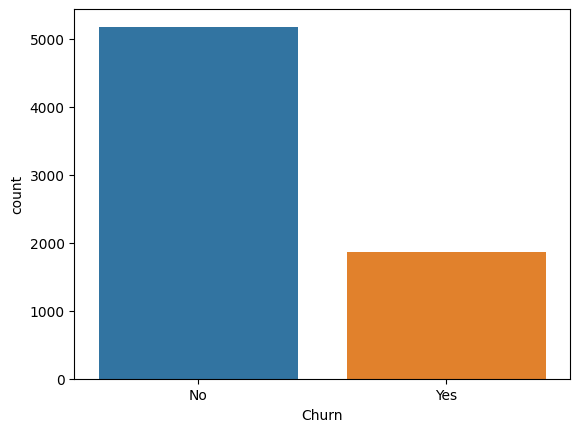

In [12]:
# Plot a histogram of the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.show()

In [13]:
# Plot a heatmap of the correlation matrix
#sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
#plt.show()

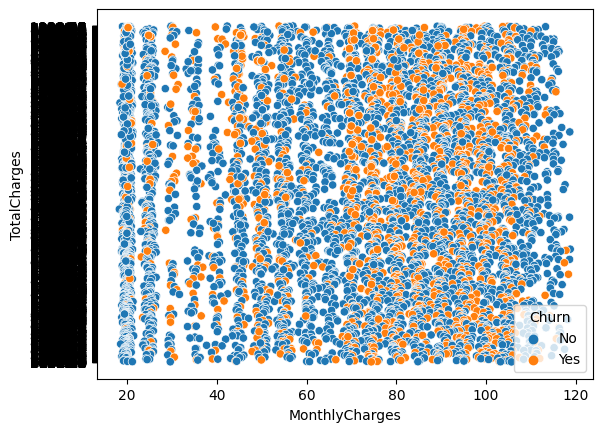

In [14]:
# Plot a scatterplot of monthly charges vs. total charges
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')
plt.show()

In [15]:
# Plot a barplot of contract type vs. churn
#sns.barplot(x='Contract', y='Churn', data=df)
#plt.show()

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [16]:
# Code here

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

Text(0.5, 1.0, 'Correlation Heatmap')

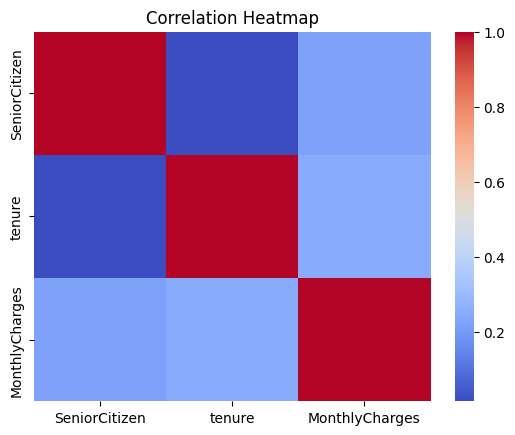

In [17]:
# Bivariate analysis

# Multivariate analysis
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Churn by Gender')

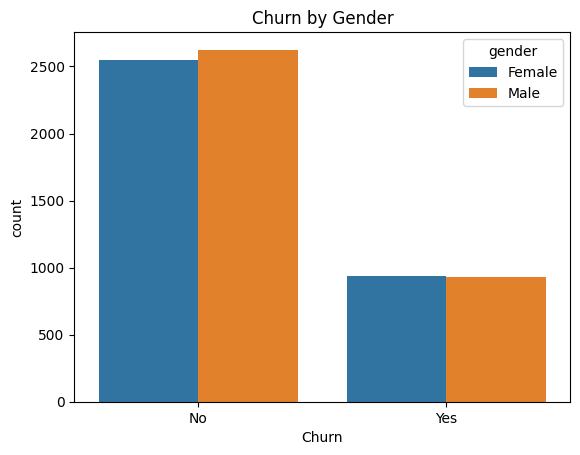

In [18]:
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Churn by Gender')



Text(0.5, 1.0, 'Churn by Internet Service')

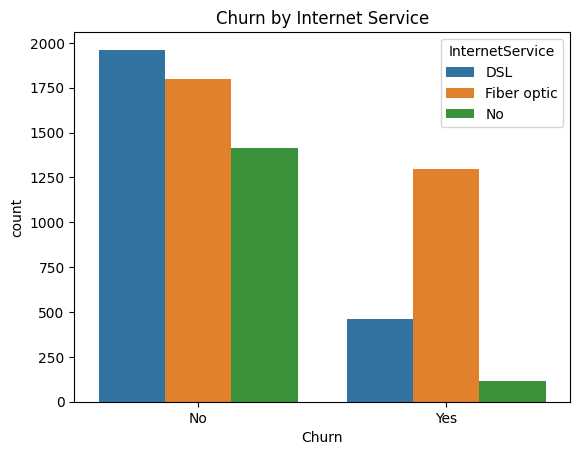

In [19]:
sns.countplot(x='Churn', hue='InternetService', data=df)
plt.title('Churn by Internet Service')


## Answering Questions

### 1. What percentage of customers have churned?

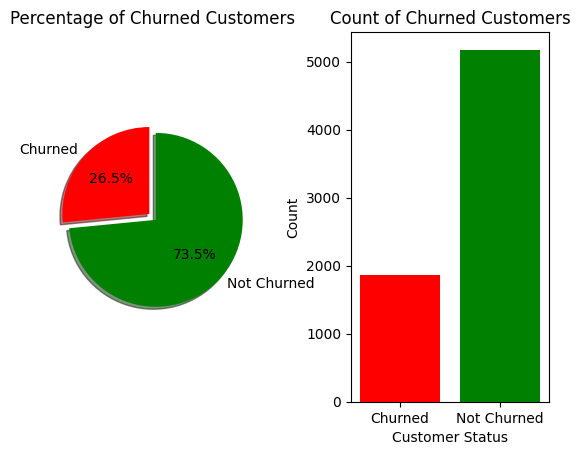

In [20]:
import matplotlib.pyplot as plt

# Calculate the percentage of churned customers
churned = df[df["Churn"] == "Yes"]
percentage_churned = (len(churned) / len(df)) * 100

# Create pie chart
labels = ["Churned", "Not Churned"]
sizes = [percentage_churned, 100 - percentage_churned]
colors = ["red", "green"]
explode = (0.1, 0)

# Create subplot for pie chart
plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Percentage of Churned Customers")

# Count the number of churned and not churned customers
churned = df[df["Churn"] == "Yes"]
not_churned = df[df["Churn"] == "No"]
count_churned = len(churned)
count_not_churned = len(not_churned)

# Create bar plot
labels = ["Churned", "Not Churned"]
counts = [count_churned, count_not_churned]
colors = ["red", "green"]

# Create subplot for bar plot
plt.subplot(1, 2, 2)
plt.bar(labels, counts, color=colors)
plt.title("Count of Churned Customers")
plt.xlabel("Customer Status")
plt.ylabel("Count")

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.5)

# Display the plots
plt.show()



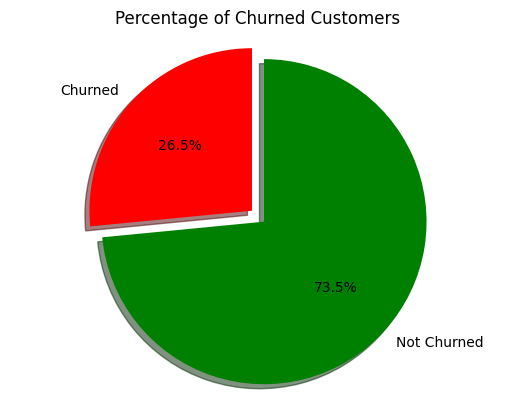

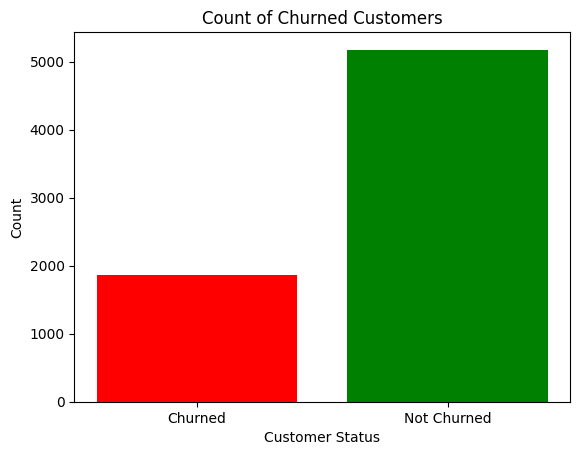

In [21]:
# Calculate the percentage of churned customers
churned = df[df["Churn"] == "Yes"]
percentage_churned = (len(churned) / len(df)) * 100# Plot the percentage of churned customers
labels = ["Churned", "Not Churned"]
sizes = [percentage_churned, 100 - percentage_churned]
colors = ["red", "green"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Percentage of Churned Customers")
plt.show()

# Bar Plot for Count

# Count the number of churned and not churned customers
churned = df[df["Churn"] == "Yes"]
not_churned = df[df["Churn"] == "No"]
count_churned = len(churned)
count_not_churned = len(not_churned)

# Create a bar plot
labels = ["Churned", "Not Churned"]
counts = [count_churned, count_not_churned]
colors = ["red", "green"]
plt.bar(labels, counts, color=colors)

# Add title and labels
plt.title("Count of Churned Customers")
plt.xlabel("Customer Status")
plt.ylabel("Count")

# Display the plot
plt.show()


### 2. Is there a correlation between a customer's length of tenure with the company and their likelihood of churning?

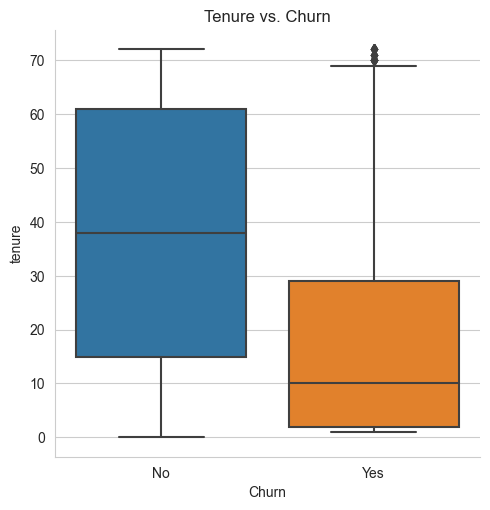

In [22]:
sns.set_style("whitegrid")
sns.catplot(x="Churn", y="tenure", kind="box", data=df)
plt.title("Tenure vs. Churn")
plt.show()

### 3. Are there any specific groups of customers based on demographic that are more likely to churn than others?

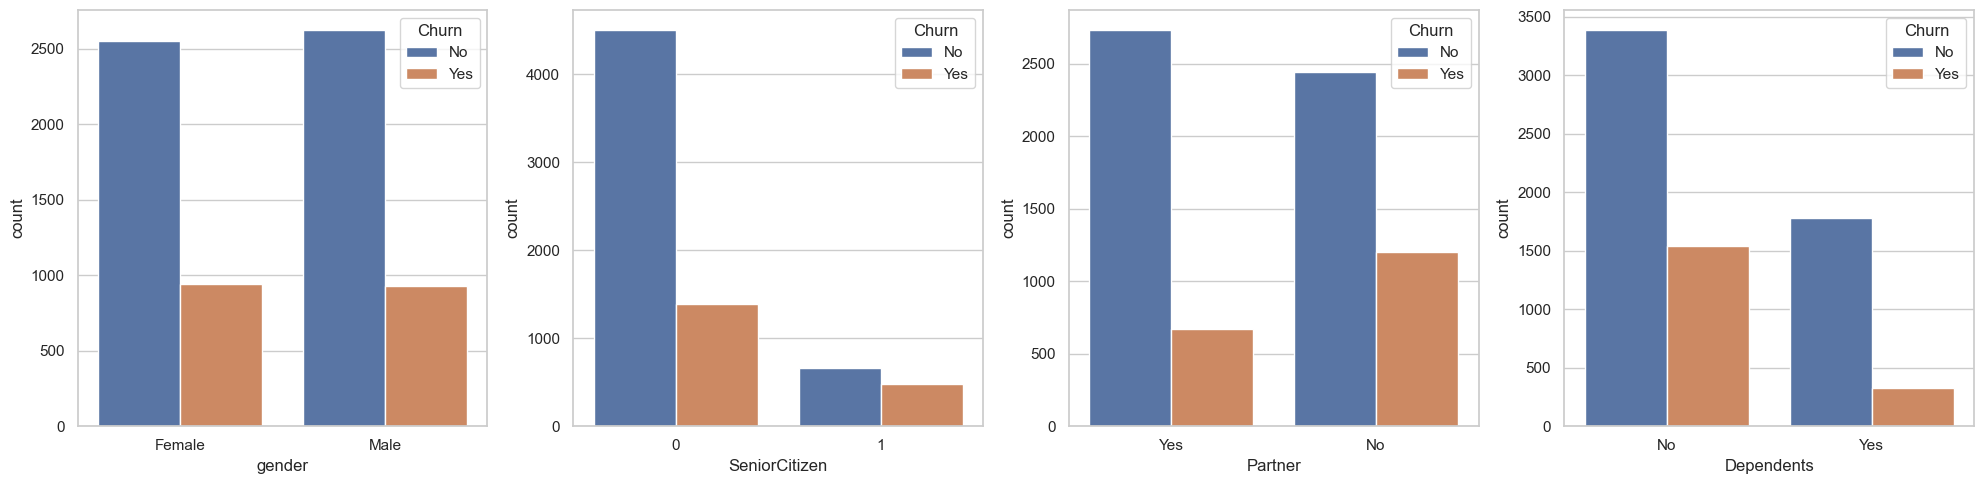

In [23]:
# Set the style of the grid
sns.set(style="whitegrid")

# Create a figure with 1 row and 4 columns
fig, axs = plt.subplots(ncols=4, figsize=(20,5))

# Plot the count of customers by gender with respect to churn status and place it in the first column of the figure
sns.countplot(x="gender", hue="Churn", data=df, ax=axs[0])

# Plot the count of customers by SeniorCitizen status with respect to churn status and place it in the second column of the figure
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=axs[1])

# Plot the count of customers by Partner status with respect to churn status and place it in the third column of the figure
sns.countplot(x="Partner", hue="Churn", data=df, ax=axs[2])

# Plot the count of customers by Dependents status with respect to churn status and place it in the fourth column of the figure
sns.countplot(x="Dependents", hue="Churn", data=df, ax=axs[3])

# Ensure the subplots are properly spaced out
plt.tight_layout()

# Display the figure
plt.show()

### 4. Can customer retention be improved by offering longer contract terms?

[Text(0.5, 1.0, 'Customer Churn by Contract Term'),
 Text(0.5, 0, 'Contract Term'),
 Text(0, 0.5, 'Count')]

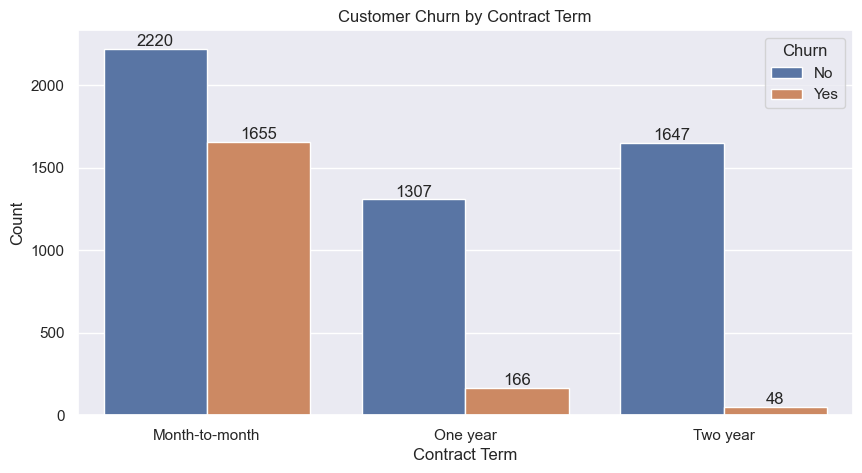

In [24]:
# Set the figure size
sns.set(rc={'figure.figsize':(10,5)})

# Create the countplot with the 'Contract' variable on the x-axis and the 'Churn' variable as the hue
ax = sns.countplot(data=df, x='Contract', hue='Churn')

# Add labels to the bars showing the count of each category
for container in ax.containers:
    ax.bar_label(container)

# Add a title and axis labels
ax.set(title='Customer Churn by Contract Term', xlabel='Contract Term', ylabel='Count')


### 6. What is the relationship between Internet Services and churn rate?

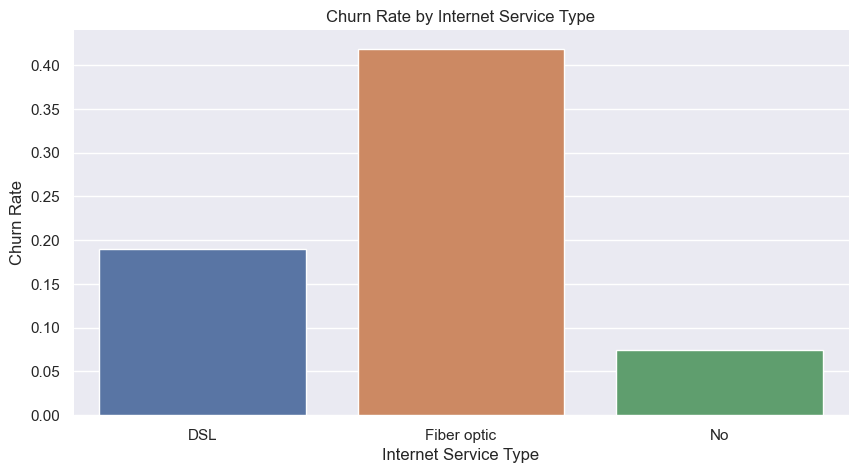

In [25]:
# Calculate the churn rates by internet service type
churn_rates = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index()# Create a bar plot of the churn rates by internet service type using seaborn
sns.barplot(data=churn_rates, x='InternetService', y='Churn')
sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.show()

In [26]:
# Calculate the current total revenue
current_revenue = df['MonthlyCharges'].sum()

# Calculate the potential total revenue
potential_revenue = (df['MonthlyCharges'].mean() * df['tenure'].mean() * len(df))

# Calculate the amount the company could save
savings = potential_revenue - current_revenue

print(f"Current revenue: ${current_revenue:.2f}")
print(f"Potential revenue: ${potential_revenue:.2f}")
print(f"Savings: ${savings:.2f}")

Current revenue: $456116.60
Potential revenue: $14765018.26
Savings: $14308901.66


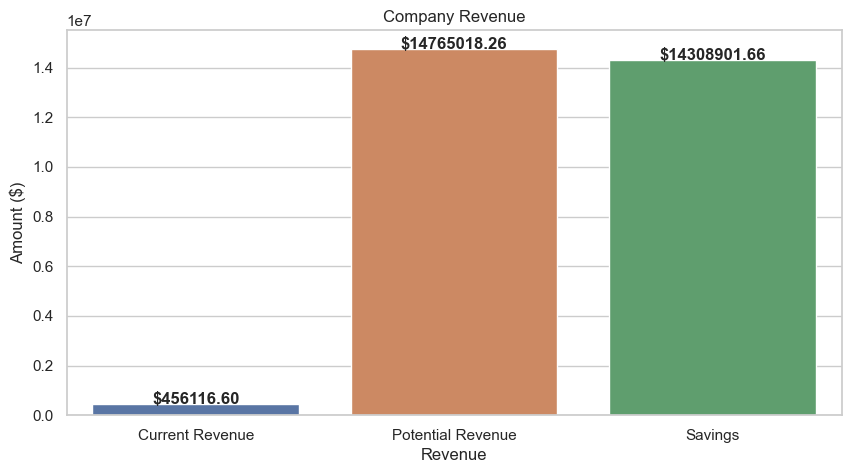

In [27]:
# Define the data
labels = ['Current Revenue', 'Potential Revenue', 'Savings']
values = [current_revenue, potential_revenue, savings]

# Set seaborn style
sns.set_style("whitegrid")

# Create the bar chart
ax = sns.barplot(x=labels, y=values)

# Add labels to each bar
for i in range(len(labels)):
    ax.text(x=i, y=values[i]+50, s=f"${values[i]:.2f}", ha='center', fontweight='bold')

# Add axis labels and title
ax.set(xlabel='Revenue', ylabel='Amount ($)', title='Company Revenue')

# Show the chart
plt.show()

## Answering Hypotheses

##### H0: There is no significant difference in churn rates between male and female customers.
##### H1: There is a significant difference in churn rates between male and female customers.

In [28]:
# Calculate the total number of male and female customers
total_male = df['gender'].value_counts()['Male']
total_female = df['gender'].value_counts()['Female']

# Calculate the number of male and female customers who churned
churned_male = df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')].shape[0]
churned_female = df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')].shape[0]

# Calculate the churn rates for male and female customers
churn_rate_male = (churned_male / total_male).round(2)
churn_rate_female = (churned_female / total_female).round(2)

print("Churn rate for male customers:", churn_rate_male)
print("Churn rate for female customers:", churn_rate_female)

Churn rate for male customers: 0.26
Churn rate for female customers: 0.27


In [29]:
import scipy.stats as stats

# churn rates for male customers
male_churn_rates = 0.2616033755274262

# churn rates for female customers
female_churn_rates = 0.26920871559633025

# perform two-sample t-test with equal variances assumed
t_statistic, p_value = stats.ttest_ind(male_churn_rates, female_churn_rates, equal_var=True)

# print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# compare p-value with alpha (e.g., 0.05) to determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference in churn rates between male and female customers.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in churn rates between male and female customers.")

t-statistic: nan
p-value: nan
Fail to reject null hypothesis. There is no significant difference in churn rates between male and female customers.


##### H0: There is no significant relationship between the customer's internet service provider and their likelihood to churn.
##### H1: There is a significant relationship between the customer's internet service provider and their likelihood to churn.

In [30]:
# Converting SeniorCitizen into categorical feature
df.SeniorCitizen.replace(0, "No", inplace = True)
df.SeniorCitizen.replace(1, "Yes", inplace = True)

# Label Encoding target column
df.Churn.replace("No", 0, inplace = True)
df.Churn.replace("Yes", 1, inplace = True)

In [31]:
# Calculate churn rates by internet service provider
churn_rates = df.groupby('InternetService')['Churn'].mean().round(3)

print(churn_rates)

InternetService
DSL            0.190
Fiber optic    0.419
No             0.074
Name: Churn, dtype: float64


In [32]:
from scipy.stats import chi2_contingency
# create a contingency table of internet service provider and churn
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

# perform the chi-squared test and print the results
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-squared test results:')
print(f'Chi2 = {chi2:.2f}, p-value = {p_value:.4f}, degrees of freedom = {dof}')
if p_value < 0.05:
    print('Reject null hypothesis: There is a significant relationship between the customer\'s internet service provider and their likelihood to churn.')
else:
    print('Fail to reject null hypothesis: There is no significant relationship between the customer\'s internet service provider and their likelihood to churn.')

Chi-squared test results:
Chi2 = 732.31, p-value = 0.0000, degrees of freedom = 2
Reject null hypothesis: There is a significant relationship between the customer's internet service provider and their likelihood to churn.


##### H0: There is no significant difference in churn rates between customers on different types of payment methods.
##### H1: There is a significant difference in churn rates between customers on different types of payment methods.

In [33]:
payment_col = 'PaymentMethod'
churn_col = 'Churn'

# create a contingency table of counts
contingency_table = pd.crosstab(df[payment_col], df[churn_col])

# perform chi-square test of independence
stat, pval, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05  # significance level

# interpret results
print(f"chi-square statistic = {stat:.2f}")
print(f"p-value = {pval:.4f}")
print(f"degrees of freedom = {dof}")
print("Expected counts:")
print(expected)

if pval < alpha:
    print("Reject null hypothesis: there is a significant difference in churn rates between customers on different types of payment methods.")
else:
    print("Fail to reject null hypothesis: there is no significant difference in churn rates between customers on different types of payment methods.")

chi-square statistic = 648.14
p-value = 0.0000
degrees of freedom = 3
Expected counts:
[[1134.26891949  409.73108051]
 [1118.10705665  403.89294335]
 [1737.40025557  627.59974443]
 [1184.22376828  427.77623172]]
Reject null hypothesis: there is a significant difference in churn rates between customers on different types of payment methods.


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [34]:
# drop customerID column
new_df = df.drop('customerID', axis=1)



#### Checking Imbalance

Proportion of Churned Customers: 0.2653698707936959
Proportion of Not Churned Customers: 0.7346301292063041


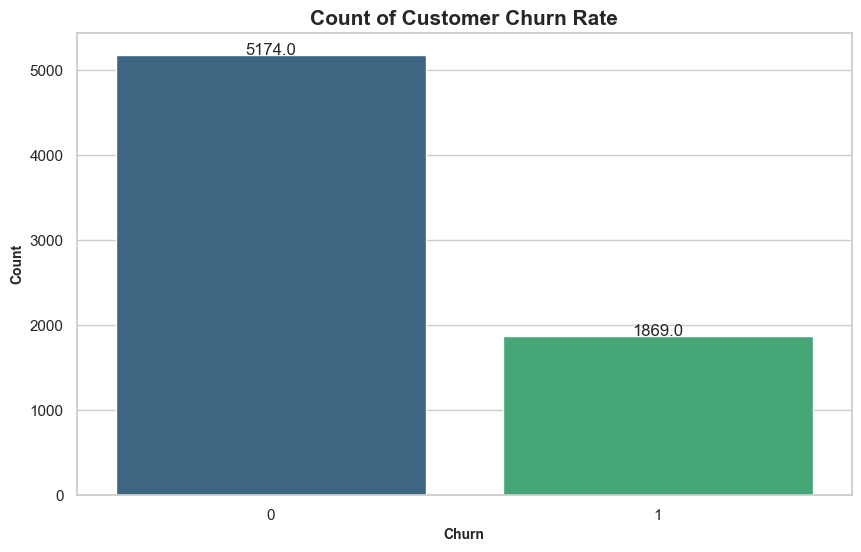

In [35]:
#check for class imbalance
plt.figure(figsize=(10,6))
ch= sns.countplot(data=df,x="Churn",palette='viridis') 
ch.set_title('Count of Customer Churn Rate',fontsize=15,fontweight='bold')
ch.set_xlabel('Churn',fontsize=10,fontweight='bold')
ch.set_ylabel('Count',fontsize=10,fontweight='bold')
for p in ch.patches:
    height = p.get_height()
    ch.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
# calculate proportion of churn categories
#churn_prop = churn_counts / len(df)
#print('Churn class proportions:')
#print(churn_prop)

# Calculate proportion of churn categories
churn_counts = df["Churn"].value_counts()
proportions = churn_counts / len(df)

# Display proportions
print("Proportion of Churned Customers:", proportions[1])
print("Proportion of Not Churned Customers:", proportions[0])


##### Data is imbalance as less people tend to churn (27%)  compared to the number that does not churn (73%)

# 

## Impute Missing Values

In [36]:
# Clean TotalCharges  and covert to float before imputing
new_df['TotalCharges'].replace({" " :np.nan}, inplace=True)
new_df['TotalCharges']=new_df['TotalCharges'].astype(float)

In [38]:
# Check for null values in data
null_rows = new_df.loc[new_df["TotalCharges"].isnull()]
null_rows.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0


In [41]:
#imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

#imputer.fit(new_df['TotalCharges'])

#new_df['TotalCharges'] = imputer.transform(new_df['TotalCharges'])

In [40]:
imputer.fit(new_df['TotalCharges'].values.reshape(-1, 1))
new_df['TotalCharges'] = imputer.transform(new_df['TotalCharges'].values.reshape(-1, 1))


In [42]:
# Recheck for null values
null_rows = new_df.loc[new_df["TotalCharges"].isnull()].values
null_rows

array([], shape=(0, 20), dtype=object)

In [43]:
# Re-Check for data types after conversion
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Drop Duplicates

In [44]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Define X and y
#X = new_df.drop('Churn', axis=1)
#y = new_df['Churn']

In [ ]:
# for percent [0; 100] of nan in dataframe
#features = X.columns
#missing_threshold = 50
#check = (new_df[features].isna().sum() / ((new_df.shape[0]) / 100))

#valid_features = check[check < missing_threshold].index.to_list()
#check.sort_values(ascending=False)

## Dataset Splitting

In [45]:
target_df = new_df['Churn']
train_df = new_df.drop(columns = ['Churn'])

In [46]:
target_df.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [47]:
train_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [48]:
# for percent [0; 100] of nan in dataframe
features = train_df.columns
missing_threshold = 50
check = (new_df[features].isna().sum() / ((new_df.shape[0]) / 100))

valid_features = check[check < missing_threshold].index.to_list()
check.sort_values(ascending=False)

gender              0.0
DeviceProtection    0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
SeniorCitizen       0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
TotalCharges        0.0
dtype: float64

In [52]:
# Define X and y
#X = new_df.drop('Churn', axis=1)
#y = new_df['Churn']


from sklearn.model_selection import train_test_split

# Define X and y
X = train_df
y = target_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




## New Features Creation

In [ ]:
# Code here

## Features Encoding




In [54]:
from sklearn.preprocessing import OrdinalEncoder

# select relevant columns

#X = df.drop('Churn', axis=1)
#y = df['Churn']

# encode categorical variable using ordinal encoding
encoder = OrdinalEncoder()
cat_cols = X.select_dtypes(include='object').columns
X_encoded = pd.DataFrame(encoder.fit_transform(X[cat_cols]))
X_encoded.columns = cat_cols

# combine encoded categorical variables with numerical variables
num_cols = X.select_dtypes(include='number').columns
X_processed = pd.concat([X_encoded, X[num_cols]], axis=1)


In [55]:
X_processed.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1,29.85,29.85
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,34,56.95,1889.50
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2,53.85,108.15
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,45,42.30,1840.75
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2,70.70,151.65


In [56]:
X_processed.shape

(7043, 19)

## Features Scaling


In [57]:
from sklearn.preprocessing import MinMaxScaler

# initialize MinMaxScaler object with specified parameters
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# select numerical columns to scale
num_cols = X_processed.select_dtypes(include='number').columns

# scale numerical columns using MinMaxScaler
X_processed[num_cols] = scaler.fit_transform(X_processed[num_cols])


In [58]:
X_processed.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.013889,0.115423,0.001275
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.472222,0.385075,0.215867
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.027778,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.625000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.027778,0.521891,0.015330


In [ ]:
# Scaling numerical variables

#scaler = StandardScaler()
#num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
#df[num_cols] = scaler.fit_transform(df[num_cols])

## Features Selection

In [ ]:
# Feature selection
# from sklearn.feature_selection import SelectKBest, chi2
# Preprocessing the data
# X = df.drop('Churn', axis=1)
# X = X.clip(lower=0)  # clip negative values to zero
# y = df['Churn']
# skb = SelectKBest(score_func=chi2, k=5)
# best_features = skb.fit(X, y)
# X = X[X.columns[best_features.get_support()]]


# Scale the features to values between 0 and 1
##X = scaler.fit_transform(X)

# Run chi-squared test for feature selection
#skb = SelectKBest(score_func=chi2, k=5)
#best_features = skb.fit(X, y)
#X = X[:, best_features.get_support()]

In [ ]:
!pip3 install --upgrade scikit-learn > /dev/null 2>&1

In [89]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, fbeta_score
from tabulate import tabulate
from sklearn.metrics import confusion_matrix

In [62]:

# Define X and y
X = X_processed
y = target_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Optional: Train set Balancing (for Classification only)

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Decision Tree model


### Create the Model

In [63]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)


### Train the Model

In [64]:
# Fit a decision tree model using the training data
dt_model.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data
dt_pred = dt_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [95]:
# Calculate the accuracy, precision, recall, F1 score, and F2 score of the decision tree model
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_f2 = fbeta_score(y_test, dt_pred, beta=2)

# Calculate the ROC curve of the decision tree model and the area under the curve (AUC)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
dt_auc = auc(dt_fpr, dt_tpr)

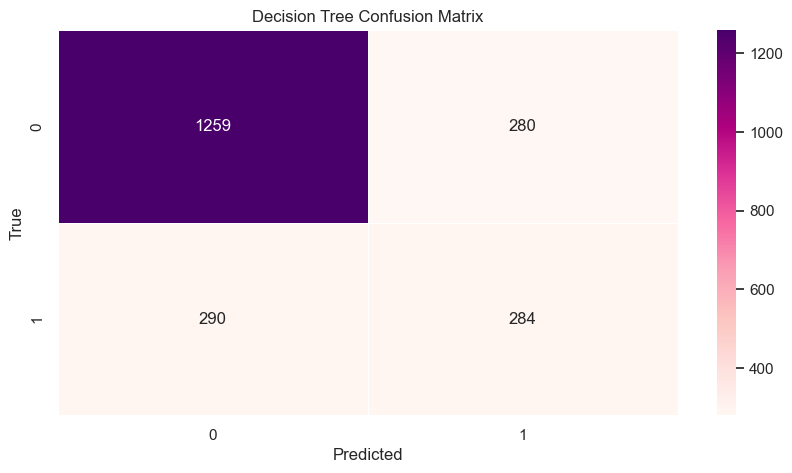

In [137]:
# Calculate the confusion matrix of the decision tree model
dt_cm = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix as a heatmap using Seaborn
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [97]:
# Round the evaluation metrics to 3 decimal places
dt_acc = round(dt_acc, 3)
dt_prec = round(dt_prec, 3)
dt_rec = round(dt_rec, 3)
dt_f1 = round(dt_f1, 3)
dt_f2 = round(dt_f2, 3)
dt_auc = round(dt_auc, 3)


# Create a results table
dt_results_table = [
    ["Decision Tree", dt_acc, dt_prec, dt_rec, dt_f1, dt_f2, dt_auc],
]

# Define column headers
dt_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(dt_results_table, headers=dt_headers))


Model            Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------  ----------  -----------  --------  ----------  ----------  -----
Decision Tree        0.73        0.504     0.495       0.499       0.497  0.656


### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification


## Gradient Boosting model

### Create the Model

In [67]:
# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

### Train the Model

In [68]:
# Train the gradient boosting model on the training data
gb_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
gb_pred = gb_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [98]:
# Compute the evaluation metrics for the gradient boosting model
gb_acc = accuracy_score(y_test, gb_pred)
gb_prec = precision_score(y_test, gb_pred)
gb_rec = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_f2 = fbeta_score(y_test, dt_pred, beta=2)

# Compute the ROC curve and AUC score for the gradient boosting model
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_pred)
gb_auc = auc(gb_fpr, gb_tpr)

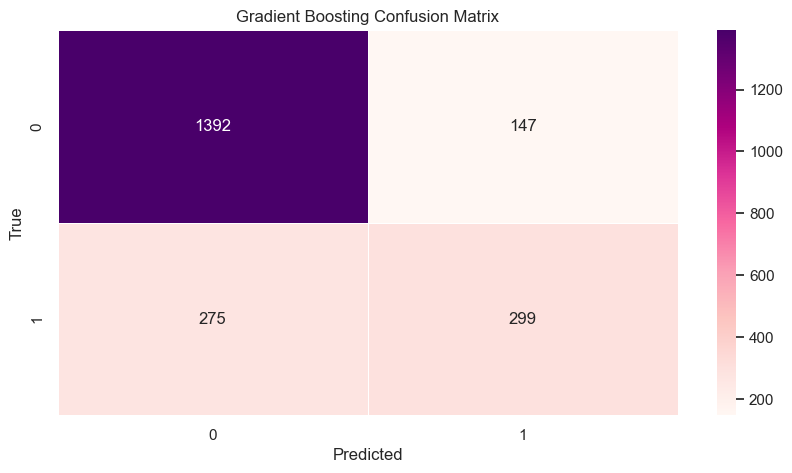

In [138]:
# Compute the confusion matrix for the gradient boosting model
gb_cm = confusion_matrix(y_test, gb_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(gb_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [83]:
# Round the evaluation metrics to 3 decimal places
gb_acc = round(gb_acc, 3)
gb_prec = round(gb_prec, 3)
gb_rec = round(gb_rec, 3)
gb_f1 = round(gb_f1, 3)
gb_f2 = round(gb_f2, 3)
gb_auc = round(gb_auc, 3)


# Create a results table
gb_results_table = [
    ["Gradient Boosting", gb_acc, gb_prec, gb_rec, gb_f1, gb_f2, gb_auc],
]

# Define column headers
gb_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(gb_results_table, headers=gb_headers))


Model                Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-----------------  ----------  -----------  --------  ----------  ----------  -----
Gradient Boosting         0.8         0.67     0.521       0.586       0.497  0.713


### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Logistic Regression

### Create the Model

In [102]:
# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

### Train the Model

In [103]:
# Fit the logistic regression model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data using the fitted model
lr_pred = lr_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [104]:
# Compute the valid metrics for the use case # Optional: show the classification report 
lr_acc = accuracy_score(y_test, lr_pred)  # calculate the accuracy score
lr_prec = precision_score(y_test, lr_pred)  # calculate the precision score
lr_rec = recall_score(y_test, lr_pred)  # calculate the recall score
lr_f1 = f1_score(y_test, lr_pred)  # calculate the F1 score
lr_f2 = fbeta_score(y_test, lr_pred, beta=2)  # calculate the F2 score (weighted towards recall)

# calculate the ROC curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)  
lr_auc = auc(lr_fpr, lr_tpr)  # calculate the area under the ROC curve

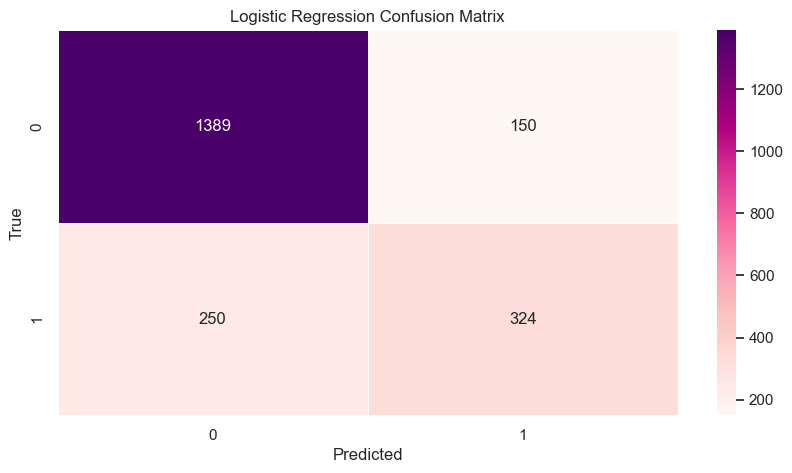

In [139]:
# Compute the confusion matrix for the logistic regression model
lr_cm = confusion_matrix(y_test, lr_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(lr_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [106]:
# Round the evaluation metrics to 3 decimal places
lr_acc = round(lr_acc, 3)
lr_prec = round(lr_prec, 3)
lr_rec = round(lr_rec, 3)
lr_f1 = round(lr_f1, 3)
lr_f2 = round(lr_f2, 3)
lr_auc = round(lr_auc, 3)


# Create a results table
lr_results_table = [
    ["Logistic Regression", lr_acc, lr_prec, lr_rec, lr_f1, lr_f2, lr_auc],
]

# Define column headers
lr_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(lr_results_table, headers=lr_headers))

Model                  Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------------  ----------  -----------  --------  ----------  ----------  -----
Logistic Regression       0.811        0.684     0.564       0.618       0.585  0.733


## Stochastic Gradient Descent

### Create the Model

In [107]:
# Create a Stochastic Gradient Descent model
sgd_model = SGDClassifier(random_state=42)


### Train the Model

In [108]:
# Train the model on the training data
sgd_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
sgd_pred = sgd_model.predict(X_test)


### Evaluate the Model on the Evaluation dataset (Evalset)

In [109]:
# Calculate performance metrics for the stochastic gradient descent model
sgd_acc = accuracy_score(y_test, sgd_pred)       # Accuracy score
sgd_prec = precision_score(y_test, sgd_pred)     # Precision score
sgd_rec = recall_score(y_test, sgd_pred)         # Recall score
sgd_f1 = f1_score(y_test, sgd_pred)              # F1 score
sgd_f2 = fbeta_score(y_test, sgd_pred, beta=2)   # F2 score with beta=2

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_pred)
sgd_auc = auc(sgd_fpr, sgd_tpr)

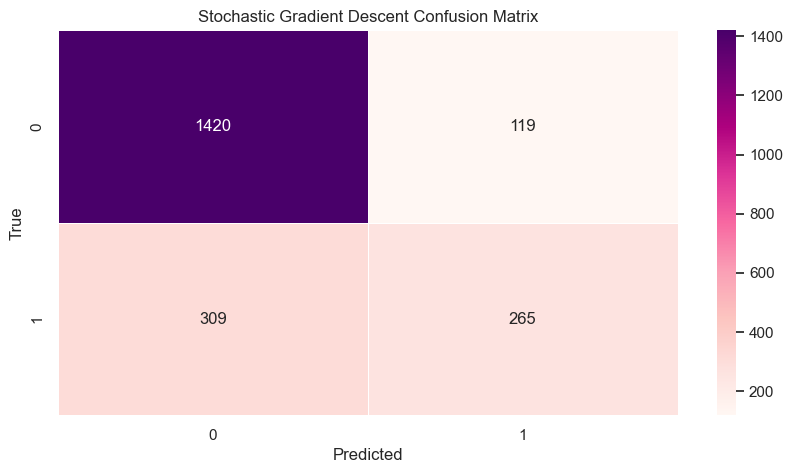

In [140]:
# Compute the confusion matrix for the stochastic gradient descent model
sgd_cm = confusion_matrix(y_test, sgd_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(sgd_cm, annot=True, linewidth=0.5, fmt=".0f", cmap='RdPu')

# Add a title and axis labels to the heatmap
plt.title("Stochastic Gradient Descent Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Display the heatmap
plt.show()

In [111]:
# Round the evaluation metrics to 3 decimal places
sgd_acc = round(sgd_acc, 3)
sgd_prec = round(sgd_prec, 3)
sgd_rec = round(sgd_rec, 3)
sgd_f1 = round(sgd_f1, 3)
sgd_f2 = round(sgd_f2, 3)
sgd_auc = round(sgd_auc, 3)


# Create a results table
sgd_results_table = [
    ["Stochastic Gradient Descent", sgd_acc, sgd_prec, sgd_rec, sgd_f1, sgd_f2, sgd_auc],
]

# Define column headers
sgd_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the results table using tabulate
print(tabulate(sgd_results_table, headers=sgd_headers))

Model                          Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
---------------------------  ----------  -----------  --------  ----------  ----------  -----
Stochastic Gradient Descent       0.797         0.69     0.462       0.553       0.494  0.692


## K-Nearest Neighbours

### Create the Model

In [112]:
# Create a K-Nearest Neighbours model
knn_model = KNeighborsClassifier()

### Train the Model

In [113]:
# Train the model on the training data
knn_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
knn_pred = knn_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [114]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
knn_acc = round(accuracy_score(y_test, knn_pred), 3)
knn_prec = round(precision_score(y_test, knn_pred), 3)
knn_rec = round(recall_score(y_test, knn_pred), 3)
knn_f1 = round(f1_score(y_test, knn_pred), 3)
knn_f2 = round(fbeta_score(y_test, knn_pred, beta=2), 3)

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred)
knn_auc = round(auc(knn_fpr, knn_tpr), 3)

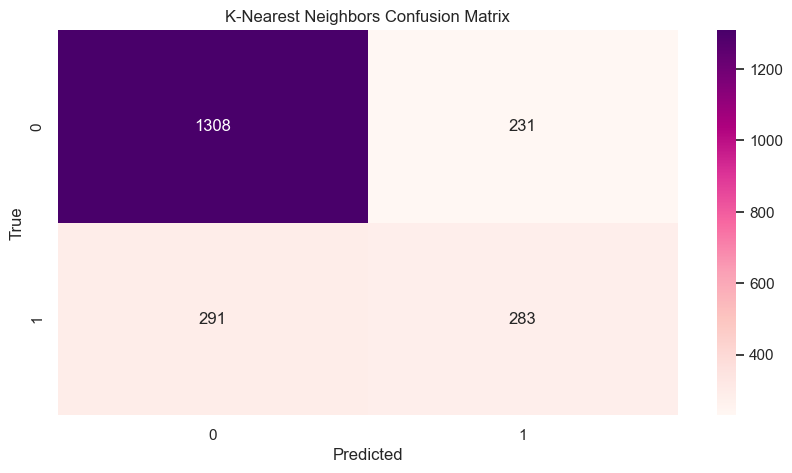

In [115]:
# Compute the confusion matrix for the K-Nearest Neighbours model
knn_cm = confusion_matrix(y_test, knn_pred)

# Create a heatmap visualization of the confusion matrix using seaborn
sns.heatmap(knn_cm, annot=True, fmt=".0f", cmap='RdPu')

plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [116]:
# Round the evaluation metrics to 3 decimal places
knn_acc = round(knn_acc, 3)
knn_prec = round(knn_prec, 3)
knn_rec = round(knn_rec, 3)
knn_f1 = round(knn_f1, 3)
knn_f2 = round(knn_f2, 3)
knn_auc = round(knn_auc, 3)


# K-Nearest Neighbours
knn_results_table = [
    ["K-Nearest Neighbours", knn_acc, knn_prec, knn_rec, knn_f1, knn_f2, knn_auc],
]

# Define column headers
knn_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the K-Nearest Neighbours results table using tabulate
print(tabulate(knn_results_table, headers=knn_headers))

Model                   Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
--------------------  ----------  -----------  --------  ----------  ----------  -----
K-Nearest Neighbours       0.753        0.551     0.493        0.52       0.504  0.671


## Random Forest Model

### Create the Model

In [119]:
# Create a Random Forest model
rf_model = RandomForestClassifier()


### Train the Model

In [120]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
rf_pred = rf_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [123]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
rf_acc = round(accuracy_score(y_test, rf_pred), 3)
rf_prec = round(precision_score(y_test, rf_pred), 3)
rf_rec = round(recall_score(y_test, rf_pred), 3)
rf_f1 = round(f1_score(y_test, rf_pred), 3)
rf_f2 = round(fbeta_score(y_test, rf_pred, beta=2), 3)

# Calculate the false positive rate, true positive rate, and AUC for the ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
rf_auc = round(auc(rf_fpr, rf_tpr), 3)

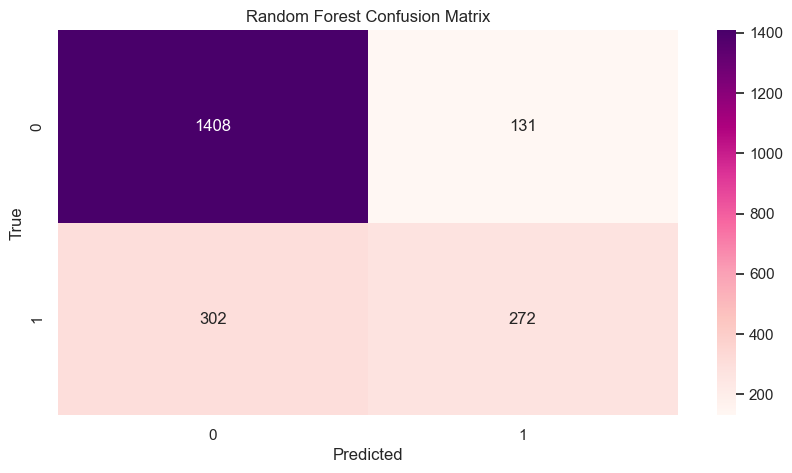

In [124]:
# compute the confusion matrix using true label values and predicted label values
rf_cm = confusion_matrix(y_test, rf_pred)

# plot the confusion matrix using seaborn heatmap with annotations and color map
sns.heatmap(rf_cm, annot=True, fmt=".0f", cmap='RdPu')


plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [125]:
# Round the evaluation metrics to 3 decimal places
rf_acc = round(rf_acc, 3)
rf_prec = round(rf_prec, 3)
rf_rec = round(rf_rec, 3)
rf_f1 = round(rf_f1, 3)
rf_f2 = round(rf_f2, 3)
rf_auc = round(rf_auc, 3)


# Random Forest Model
rf_results_table = [
    ["Random Forest Model", rf_acc, rf_prec, rf_rec, rf_f1, rf_f2, rf_auc],
]

# Define column headers
rf_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the Random Forest Model results table using tabulate
print(tabulate(rf_results_table, headers=rf_headers))

Model                  Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-------------------  ----------  -----------  --------  ----------  ----------  -----
Random Forest Model       0.795        0.675     0.474       0.557       0.504  0.694


## Support Vector machines

### Create the Model

In [128]:
# Create a Support Vector machines model
svm_model = SVC()

### Train the Model

In [129]:
# Train the model on the training data
svm_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
svm_pred = svm_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [130]:
# Calculate accuracy, precision, recall, f1 score, and f2 score
svm_acc = round(accuracy_score(y_test, svm_pred), 3)
svm_prec = round(precision_score(y_test, svm_pred), 3)
svm_rec = round(recall_score(y_test, svm_pred), 3)
svm_f1 = round(f1_score(y_test, svm_pred), 3)
svm_f2 = round(fbeta_score(y_test, svm_pred, beta=2), 3)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred)
svm_auc = round(auc(svm_fpr, svm_tpr), 3)


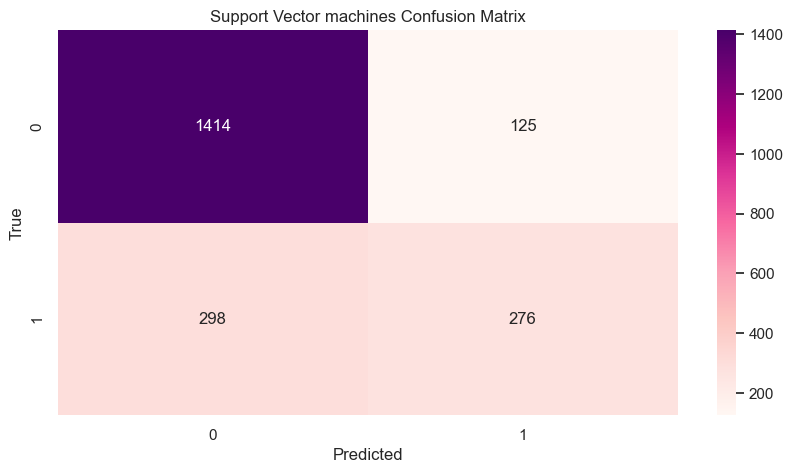

In [131]:
# compute the confusion matrix using true label values and predicted label values
svm_cm = confusion_matrix(y_test, svm_pred)

# plot the confusion matrix using seaborn heatmap
sns.heatmap(svm_cm, annot=True, fmt=".0f", cmap='RdPu')

plt.title("Support Vector machines Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [132]:
# Round the evaluation metrics to 3 decimal places
svm_acc = round(svm_acc, 3)
svm_prec = round(svm_prec, 3)
svm_rec = round(svm_rec, 3)
svm_f1 = round(svm_f1, 3)
svm_f2 = round(svm_f2, 3)
svm_auc = round(svm_auc, 3)


# Support Vector Machines
svm_results_table = [
    ["Support Vector Machines", svm_acc, svm_prec, svm_rec, svm_f1, svm_f2, svm_auc],
]

# Define column headers
svm_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score", "AUC"]

# Print the Support Vector Machines results table using tabulate
print(tabulate(svm_results_table, headers=svm_headers))

Model                      Accuracy    Precision    Recall    F1 Score    F2 Score    AUC
-----------------------  ----------  -----------  --------  ----------  ----------  -----
Support Vector Machines         0.8        0.688     0.481       0.566       0.512    0.7


### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison

In [134]:
# Create a table to compare the evaluation results
model_results_table = pd.DataFrame({'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 
                                        'Stochastic Gradient Descent', 
                                        'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines'],
                              'Accuracy': [dt_acc, gb_acc, lr_acc, sgd_acc, knn_acc, rf_acc, svm_acc],
                              'Precision': [dt_prec, gb_prec, lr_prec, sgd_prec, knn_prec, rf_prec, svm_prec],
                              'Recall': [dt_rec, gb_rec, lr_rec, sgd_rec, knn_rec, rf_rec, svm_rec],
                              'F1 Score': [dt_f1, gb_f1, lr_f1, sgd_f1, knn_f1, rf_f1, svm_f1],
                              'F2 Score': [dt_f2, gb_f2, lr_f2, sgd_f2, knn_f2, rf_f2, svm_f2],
                              'AUC': [dt_auc, gb_auc, lr_auc, sgd_auc, knn_auc, rf_auc, svm_auc]})

model_results_table

# Print the comparison table
#print("\nComparison Table of Evaluation Results:")
#print(model_results_table)

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Decision Tree,0.730000,0.504000,0.495000,0.499000,0.497000,0.656000
1,Gradient Boosting,0.800284,0.670404,0.520906,0.586275,0.496503,0.712695
2,Logistic Regression,0.811000,0.684000,0.564000,0.618000,0.585000,0.733000
3,Stochastic Gradient Descent,0.797000,0.690000,0.462000,0.553000,0.494000,0.692000
4,K-Nearest Neighbours,0.753000,0.551000,0.493000,0.520000,0.504000,0.671000
5,Random Forest,0.795000,0.675000,0.474000,0.557000,0.504000,0.694000
6,Support Vector Machines,0.800000,0.688000,0.481000,0.566000,0.512000,0.700000


In [135]:
# Create a table to compare the evaluation results
model_results_table = pd.DataFrame({'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 
                                        'Stochastic Gradient Descent', 
                                        'K-Nearest Neighbours', 'Random Forest', 'Support Vector Machines'],
                              'Accuracy': [dt_acc, gb_acc, lr_acc, sgd_acc, knn_acc, rf_acc, svm_acc],
                              'Precision': [dt_prec, gb_prec, lr_prec, sgd_prec, knn_prec, rf_prec, svm_prec],
                              'Recall': [dt_rec, gb_rec, lr_rec, sgd_rec, knn_rec, rf_rec, svm_rec],
                              'F1 Score': [dt_f1, gb_f1, lr_f1, sgd_f1, knn_f1, rf_f1, svm_f1],
                              'F2 Score': [dt_f2, gb_f2, lr_f2, sgd_f2, knn_f2, rf_f2, svm_f2],
                              'AUC': [dt_auc, gb_auc, lr_auc, sgd_auc, knn_auc, rf_auc, svm_auc]})


# Sort by Accuracy in descending order
sorted_table = model_results_table.sort_values(by=['F1 Score'], ascending=False)

sorted_table

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
2,Logistic Regression,0.811000,0.684000,0.564000,0.618000,0.585000,0.733000
1,Gradient Boosting,0.800284,0.670404,0.520906,0.586275,0.496503,0.712695
6,Support Vector Machines,0.800000,0.688000,0.481000,0.566000,0.512000,0.700000
5,Random Forest,0.795000,0.675000,0.474000,0.557000,0.504000,0.694000
3,Stochastic Gradient Descent,0.797000,0.690000,0.462000,0.553000,0.494000,0.692000
4,K-Nearest Neighbours,0.753000,0.551000,0.493000,0.520000,0.504000,0.671000
0,Decision Tree,0.730000,0.504000,0.495000,0.499000,0.497000,0.656000


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app